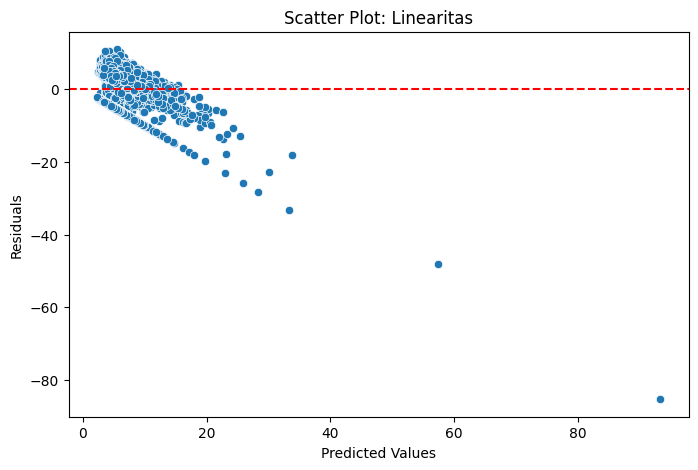


Variance Inflation Factor (VIF):
               Feature        VIF
0               const  63.784784
1       Loan To Value   1.006013
2                 Age   1.015435
3          FICO Score   1.002435
4  Number of Accounts   1.029003
5    Disbursed Amount   1.008973

Breusch-Pagan Test (Homoskedastisitas):
LM Statistic: 7064.9748, p-value: 0.0000


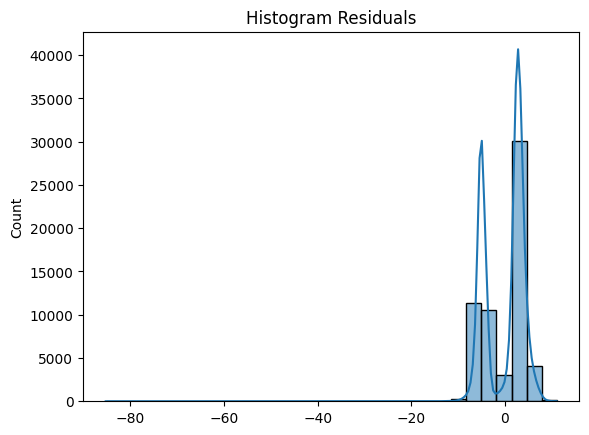


Shapiro-Wilk Test (Normalitas Residuals):
Statistic: 0.8595, p-value: 0.0000


c:\Users\Fawwaz Widyadhana\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59477.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# Load dataset
df = pd.read_csv('Data Scientist - Assignment.csv')

# Pilih variabel dependen dan independen
X = df[['Loan To Value', 'Age', 'FICO Score', 'Number of Accounts', 'Sanctioned Amount', 'Disbursed Amount']]
y = df['Instalment Amount']

# Hilangkan salah satu variabel dengan multikolinearitas tinggi
X = X.drop(columns=['Sanctioned Amount'])  # Bisa juga 'Disbursed Amount'

# Transformasi log untuk y untuk mengatasi heteroskedastisitas
y = np.log1p(y)

# Tambahkan intercept untuk regresi
X = sm.add_constant(X)

# Model regresi dengan HCSE (Robust Standard Errors)
model = sm.OLS(y, X).fit(cov_type='HC3')
residuals = model.resid

# 1. Pengecekan Linearitas (Scatter plot antara prediksi dan residu)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot: Linearitas')
plt.show()

# 2. Pengecekan Multikolinearitas (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)

# 3. Pengecekan Homoskedastisitas (Uji Breusch-Pagan)
bp_test = het_breuschpagan(residuals, X)
print("\nBreusch-Pagan Test (Homoskedastisitas):")
print(f'LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}')

# 4. Pengecekan Normalitas dari Error Terms (Histogram & Uji Shapiro-Wilk)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram Residuals')
plt.show()

shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk Test (Normalitas Residuals):")
print(f'Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}')
